<a href="https://colab.research.google.com/github/12sandra/Data-Science-Projects/blob/main/House_pricing_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-Processing

###importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

###Load dataset

In [2]:
df=pd.read_csv("/content/House_Pricing.csv")

##Exploratory Data Analysis

In [3]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [6]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


###Handling"Date House was Sold" column

In [7]:
df['Date House was Sold']=pd.to_datetime(df['Date House was Sold'])
df['Sales_year']=df['Date House was Sold'].dt.year  #numerical
df['Sales_month']=df['Date House was Sold'].dt.month  #categorical

In [8]:
df=df.drop('Date House was Sold',axis=1)

In [9]:
#unique values
unique_counts = df.nunique()
print(unique_counts)


ID                                           21436
Sale Price                                    3625
No of Bedrooms                                  13
No of Bathrooms                                 30
Flat Area (in Sqft)                           1036
Lot Area (in Sqft)                            9778
No of Floors                                     6
Waterfront View                                  2
No of Times Visited                              4
Condition of the House                           5
Overall Grade                                   10
Area of the House from Basement (in Sqft)      946
Basement Area (in Sqft)                        306
Age of House (in Years)                        116
Renovated Year                                  70
Zipcode                                         70
Latitude                                      5034
Longitude                                      752
Living Area after Renovation (in Sqft)         777
Lot Area after Renovation (in S

### Checking For Null values

In [10]:
df.isnull().sum()

,0
ID,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489
Condition of the House,0


In [11]:
df.duplicated().sum()        #no duplicates

np.int64(0)

###Handling Missing values

In [12]:
df=df.drop('No of Times Visited',axis=1)  #too many missing values

In [13]:
df=df.dropna(subset=['Sale Price'])  #Cant replace with median values because if we does, model learn with wrong labels

In [14]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Sales_year,Sales_month
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,...,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,2017,10
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,...,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,2017,12
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,...,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,2016,2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,...,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,2017,12
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,...,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,2016,2


In [15]:
freqgraph=df.select_dtypes(include='number')
freqgraph

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Sales_year,Sales_month
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,2017,10
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,2017,12
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,2016,2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,2017,12
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,2017,5
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,2016,2
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,2017,6
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,2016,1


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Sale Price'}>,
        <Axes: title={'center': 'No of Bedrooms'}>,
        <Axes: title={'center': 'No of Bathrooms'}>],
       [<Axes: title={'center': 'Flat Area (in Sqft)'}>,
        <Axes: title={'center': 'Lot Area (in Sqft)'}>,
        <Axes: title={'center': 'No of Floors'}>,
        <Axes: title={'center': 'Overall Grade'}>],
       [<Axes: title={'center': 'Area of the House from Basement (in Sqft)'}>,
        <Axes: title={'center': 'Basement Area (in Sqft)'}>,
        <Axes: title={'center': 'Age of House (in Years)'}>,
        <Axes: title={'center': 'Renovated Year'}>],
       [<Axes: title={'center': 'Zipcode'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Living Area after Renovation (in Sqft)'}>],
       [<Axes: title={'center': 'Lot Area after Renovation (in Sqft)'}>,
        <Axes: title={'center': 'Sales_year'}>,
 

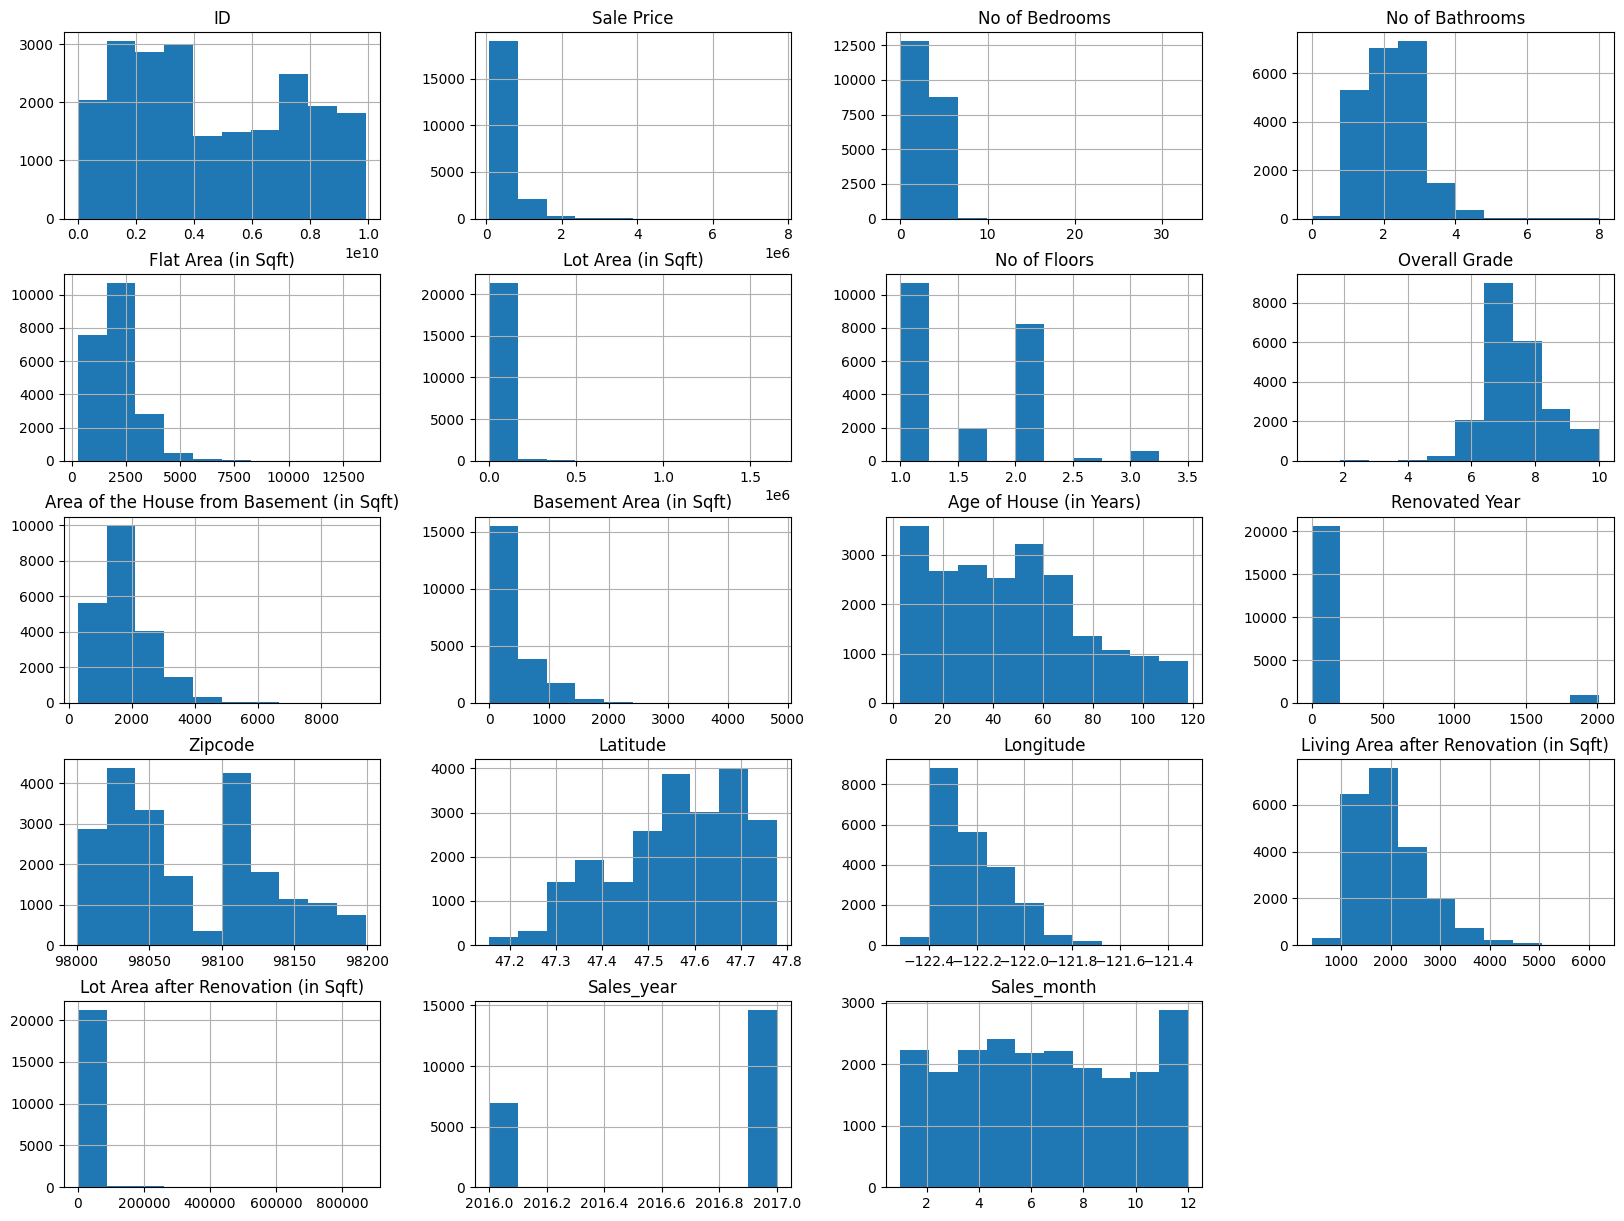

In [16]:
freqgraph.hist(figsize=(20,15))

In [17]:
df['No of Bathrooms']=df['No of Bathrooms'].fillna(df['No of Bathrooms'].median())
df['Flat Area (in Sqft)']=df['Flat Area (in Sqft)'].fillna(df['Flat Area (in Sqft)'].median())
df['Lot Area (in Sqft)']=df['Lot Area (in Sqft)'].fillna(df['Lot Area (in Sqft)'].median())
df['Area of the House from Basement (in Sqft)']=df['Area of the House from Basement (in Sqft)'].fillna(df['Area of the House from Basement (in Sqft)'].median())


In [18]:
df=df.dropna(subset=['Latitude'])
df=df.dropna(subset=['Zipcode'])            #dropping row with missing values(very less in number comapred to the whole dataset)
df=df.dropna(subset=['Longitude'])
df=df.dropna(subset=['Living Area after Renovation (in Sqft)'])


In [19]:
df.isnull().sum()

,0
ID,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0
Overall Grade,0


##Handling Outliers

<Axes: >

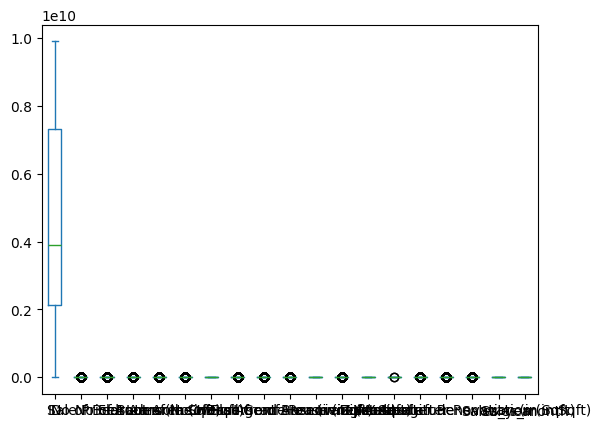

In [20]:
df.plot(kind="box")

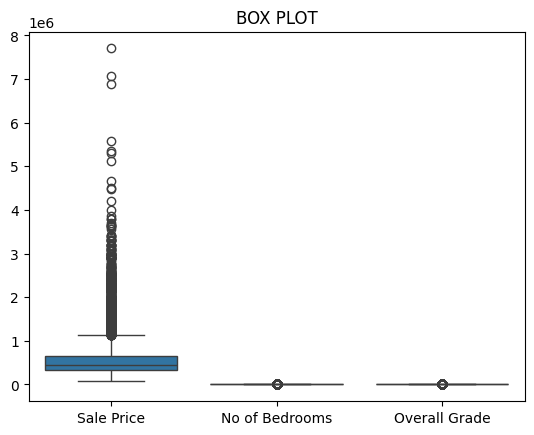

In [21]:
sns.boxplot(data=df[['Sale Price','No of Bedrooms','Overall Grade']])
plt.title("BOX PLOT")
plt.show()

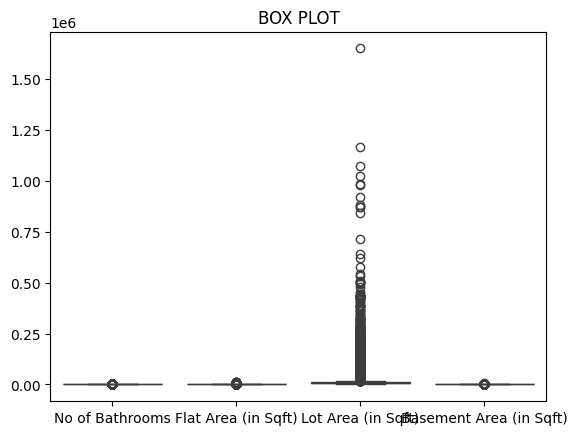

In [22]:
sns.boxplot(data=df[['No of Bathrooms',	'Flat Area (in Sqft)','Lot Area (in Sqft)','Basement Area (in Sqft)']])
plt.title("BOX PLOT")
plt.show()

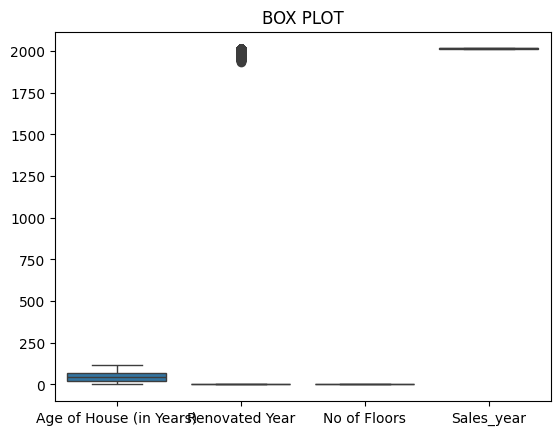

In [23]:
sns.boxplot(data=df[['Age of House (in Years)','Renovated Year','No of Floors','Sales_year']])
plt.title("BOX PLOT")
plt.show()

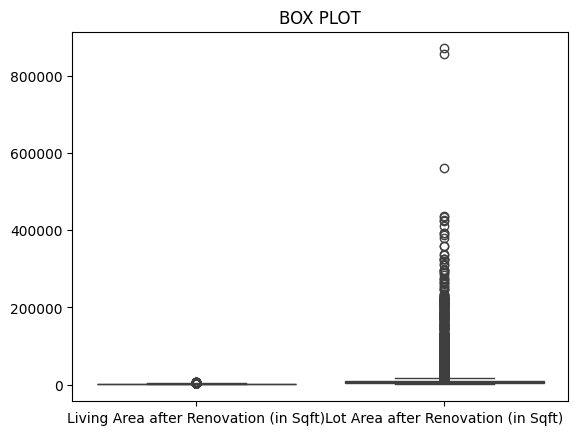

In [24]:
sns.boxplot(data=df[['Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']])
plt.title("BOX PLOT")
plt.show()

###Handling Outliers

In [25]:
df['Sale Price'].skew()
                           #Sales price outliers cannot be replaced because sale price is the target column it cannot be changes like features columns

np.float64(4.021131974779398)

In [26]:
#skewness>1 means highly skewed ,therefore apply log transformation
df['SalePrice_log'] = np.log1p(df['Sale Price'])

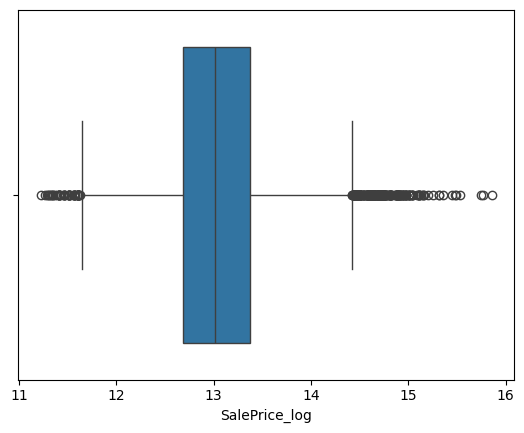

In [27]:
sns.boxplot(x=df['SalePrice_log'])   #box is tight and centered,no extreme stretching
plt.show()

In [28]:
target = 'Sale Price'


numeric_features = [
    'No of Bedrooms',
    'No of Bathrooms',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'No of Floors',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Age of House (in Years)',
    'Renovated Year',
    'Latitude',
    'Longitude',
    'Sales_year',
    'Living Area after Renovation (in Sqft)',
    'Lot Area after Renovation (in Sqft)'
]

categorical_features = [
    'Waterfront View',
    'Zipcode',                     #zipcode cannot be treated as numerical values because any calculation/comparison cannot applied to zipcode
    'Sales_month',                 #new column
    'Condition of the House'
]



In [29]:
numeric_df=df[numeric_features]

In [30]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
#print(Q1,Q3,IQR)

In [31]:
df[numeric_df.columns] = numeric_df.clip(
    lower=Q1 - 1.5 * IQR,
    upper=Q3 + 1.5 * IQR,
    axis=1
)


Features After IQR Clipping

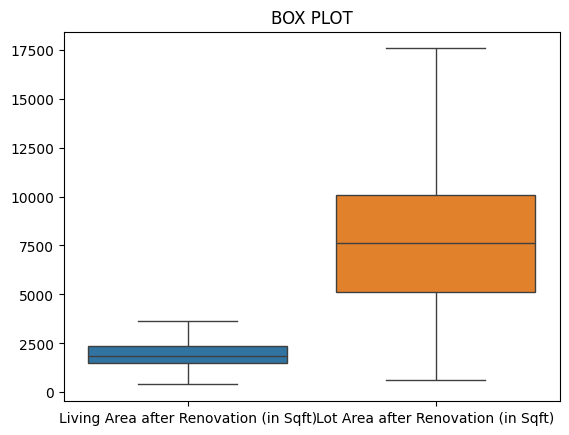

In [32]:
sns.boxplot(data=df[['Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']])
plt.title("BOX PLOT")
plt.show()

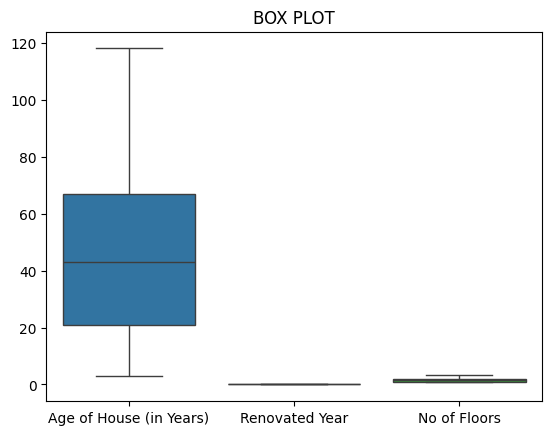

In [33]:
sns.boxplot(data=df[['Age of House (in Years)','Renovated Year','No of Floors']])
plt.title("BOX PLOT")
plt.show()

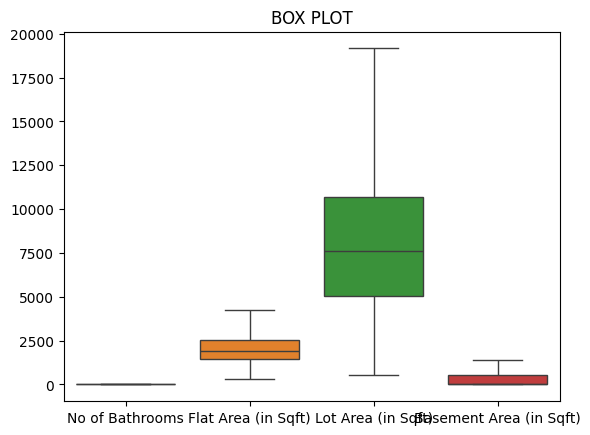

In [34]:
sns.boxplot(data=df[['No of Bathrooms',	'Flat Area (in Sqft)','Lot Area (in Sqft)','Basement Area (in Sqft)']])
plt.title("BOX PLOT")
plt.show()

#Encoding

In [35]:
df.dtypes.value_counts()

,count
float64,12
int64,6
object,2
int32,2


In [36]:
# Encode categorical columns

df= pd.get_dummies(df, columns= categorical_features, drop_first=True,dtype=int)  #if dtype=intis not added, outplt as True/False, algo cannot applied to that so it changed to int

In [37]:
df.dtypes.value_counts()

,count
int64,91
float64,11
int32,1


In [38]:
df

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Sales_month_7,Sales_month_8,Sales_month_9,Sales_month_10,Sales_month_11,Sales_month_12,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,7,1180.0,0,...,0,0,0,1,0,0,0,1,0,0
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,7,2170.0,400,...,0,0,0,0,0,1,0,1,0,0
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,6,770.0,0,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,7,1050.0,910,...,0,0,0,0,0,1,1,0,0,0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,8,1680.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3.0,2.50,1530.0,1131.0,3.0,8,1530.0,0,...,0,0,0,0,0,0,0,1,0,0
21609,6600060120,400000.0,4.0,2.50,2310.0,5813.0,2.0,8,2310.0,0,...,0,0,0,0,0,0,0,1,0,0
21610,1523300141,402101.0,2.0,0.75,1020.0,1350.0,2.0,7,1020.0,0,...,0,0,0,0,0,0,0,1,0,0
21611,291310100,400000.0,3.0,2.50,1600.0,2388.0,2.0,8,1600.0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df.shape

(21605, 103)

#Scaling

In [40]:

sscaler = StandardScaler()
df[numeric_features] = sscaler.fit_transform(df[numeric_features])

#Training & Testing data Splitting

In [41]:
X = df.drop('Sale Price', axis=1)  # X - features
Y = df['Sale Price']  # Y - target

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(17284, 102)
(4321, 102)
(17284,)
(4321,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [45]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Sales_month_7,Sales_month_8,Sales_month_9,Sales_month_10,Sales_month_11,Sales_month_12,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,-0.424842,-1.521483,-1.046602,-0.605680,-0.915399,7,-0.771763,-0.681081,...,0,0,0,1,0,0,0,1,0,0
1,6414100192,538000.0,-0.424842,0.209979,0.610333,-0.290093,0.936745,7,0.524180,0.278013,...,0,0,0,0,0,1,0,1,0,0
2,5631500400,180000.0,-1.595821,-1.521483,-1.535339,0.256634,-0.915399,6,-1.308467,-0.681081,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,604000.0,0.746137,1.248857,-0.116811,-0.734532,-0.915399,7,-0.941937,1.500858,...,0,0,0,0,0,1,1,0,0,0
4,1954400510,510000.0,-0.424842,-0.136313,-0.450582,-0.123973,-0.915399,8,-0.117246,-0.681081,...,0,0,0,0,0,0,0,1,0,0


In [46]:
X_train.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Sales_month_7,Sales_month_8,Sales_month_9,Sales_month_10,Sales_month_11,Sales_month_12,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
18144,9834200555,0.746137,1.941442,1.230194,-0.920871,0.936745,8,0.851439,0.925402,-0.714899,...,0,0,0,0,0,0,0,1,0,0
12729,1926049385,0.746137,0.556272,0.705697,-0.298419,0.936745,8,0.628903,0.278013,-0.272220,...,1,0,0,0,0,0,0,1,0,0
14110,8887001215,-0.424842,-0.482606,-0.236015,2.071856,0.010673,8,0.118380,-0.681081,1.430388,...,0,0,0,0,1,0,0,0,1,0
7234,984100010,0.746137,0.209979,0.026234,-0.199302,-0.915399,7,-0.418324,0.829492,0.102354,...,0,0,1,0,0,0,0,1,0,0
10165,9560800390,-0.424842,0.209979,-0.081050,-0.270666,0.936745,8,0.288554,-0.681081,-0.442481,...,0,0,0,0,0,0,0,1,0,0


In [47]:
Y_train.head()

,Sale Price
18144,760000.0
12729,559950.0
14110,407185.0
7234,300000.0
10165,445000.0


In [48]:
# lin_model=LinearRegression()
# lin_model.fit(X_train,Y_train)

LinearRegression()

In [49]:
# Y_pred=lin_model.predict(X_test)
# Y_pred

array([272594.30853914, 482984.81221916,  -5225.46412306, ...,
       525256.22965937, 254354.85446798, 152070.17772907])

In [50]:
# mae=mean_absolute_error(Y_test,Y_pred)
# mse=mean_squared_error(Y_test,Y_pred)
# r2=r2_score(Y_test,Y_pred)
# print("mse",mse)
# print("mae",mae)
# print("r2",r2)


mse 22734716957.57481
mae 75333.97956188314
r2 0.8441879190518644
